In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import twstock as tw
import requests as web
from ipywidgets import interact_manual

# 查詢股票代碼（可輸入代碼或名稱）

#### 讀入網頁的檔案

In [2]:
res1 = web.get("http://isin.twse.com.tw/isin/C_public.jsp?strMode=2")

In [3]:
res2= web.get("http://isin.twse.com.tw/isin/C_public.jsp?strMode=4")

#### 建立DataFrame並做整理

In [4]:
tdf1=pd.read_html(res1.text)[0]

In [5]:
tdf2=pd.read_html(res2.text)[0]

In [6]:
tdf1.columns = tdf1.iloc[0]
tdf1.drop(0,inplace=True)
tdf2.columns=tdf2.iloc[0]
tdf2.drop(0,inplace=True)

### 只選上市跟上櫃的股票並合併上市上櫃的

In [7]:
tdf1=tdf1[tdf1.CFICode=='ESVUFR']
tdf2=tdf2[tdf2.CFICode=='ESVUFR']

In [8]:
tdf=pd.concat([tdf1,tdf2])

In [9]:
tdf.index=range(1,len(tdf)+1)

## ⭐️執行
### 輸入股票代碼或名稱或產業即可看到相對應的股票資訊

In [35]:
tdf["產業別"].unique()

array(['水泥工業', '食品工業', '塑膠工業', '建材營造業', '汽車工業', '紡織纖維', '貿易百貨業', '其他業',
       '電子零組件業', '電機機械', '生技醫療業', '電器電纜', '化學工業', '玻璃陶瓷', '造紙工業', '鋼鐵工業',
       '橡膠工業', '航運業', '電腦及週邊設備業', '半導體業', '其他電子業', '通信網路業', '光電業',
       '電子通路業', '資訊服務業', '油電燃氣業', '觀光事業', '金融保險業', '農業科技業', '文化創意業',
       '電子商務'], dtype=object)

In [37]:
y=input("請輸入類別：")
tdf[tdf['產業別'].str.contains(y)]

請輸入類別：水泥工業


,有價證券代號及名稱,國際證券辨識號碼(ISIN Code),上市日,市場別,產業別,CFICode,備註
1,1101 台泥,TW0001101004,1962/02/09,上市,水泥工業,ESVUFR,NaN
2,1102 亞泥,TW0001102002,1962/06/08,上市,水泥工業,ESVUFR,NaN
3,1103 嘉泥,TW0001103000,1969/11/14,上市,水泥工業,ESVUFR,NaN
4,1104 環泥,TW0001104008,1971/02/01,上市,水泥工業,ESVUFR,NaN
5,1108 幸福,TW0001108009,1990/06/06,上市,水泥工業,ESVUFR,NaN
6,1109 信大,TW0001109007,1991/12/05,上市,水泥工業,ESVUFR,NaN
7,1110 東泥,TW0001110005,1994/10/22,上市,水泥工業,ESVUFR,NaN


In [44]:
x=input("請輸入股票代碼或名稱:")
tdf[tdf['有價證券代號及名稱'].str.contains(x)]

請輸入股票代碼或名稱:3293


,有價證券代號及名稱,國際證券辨識號碼(ISIN Code),上市日,市場別,產業別,CFICode,備註
1064,3293 鈊象,TW0003293007,2006/07/12,上櫃,文化創意業,ESVUFR,NaN


# 開始看個股的詳細報價資訊

#### 輸入查詢的股票代碼並做確認

In [2]:
ta=(input("請輸入股票代碼："))
stockcode=tw.Stock(ta)
stockinfo=tw.realtime.get(ta)
print(f"您要查詢:\n{ta}{stockinfo['info']['name']}")

請輸入股票代碼：1103
您要查詢:
1103嘉泥


## tw.內建的BestFourPoint四大買賣點分析

In [74]:
BFP=tw.BestFourPoint(stockcode)

In [75]:
BFP.best_four_point_to_buy()#買進原因

'量大收紅, 三日均價由下往上, 三日均價大於六日均價'

In [76]:
BFP.best_four_point_to_sell()#賣出原因

False

In [77]:
BFP.best_four_point()
#True建議買進 , False建議賣出 , 原因

(True, '量大收紅, 三日均價由下往上, 三日均價大於六日均價')

In [3]:
data=stockcode.fetch_from(2018,10)
df=pd.DataFrame(data)
df.set_index('date',inplace=True)
df.columns=["總成交股數","總成交金額","開盤價","盤中最高價","盤中最低價","收盤價","漲跌價差","成交筆數"]

ConnectionError: HTTPConnectionPool(host='www.twse.com.tw', port=80): Max retries exceeded with url: /exchangeReport/STOCK_DAY?date=20190701&stockNo=1103 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x115718278>: Failed to establish a new connection: [Errno 61] Connection refused'))

In [ ]:
df.date.con

In [81]:
df.tail()

,總成交股數,總成交金額,開盤價,盤中最高價,盤中最低價,收盤價,漲跌價差,成交筆數
date,,,,,,,,
2019-11-04,13000,1155000,87.3,87.4,87.3,87.4,0.1,16
2019-11-05,7000,604000,87.4,87.5,87.1,87.5,0.1,22
2019-11-06,5000,437000,87.5,87.6,87.5,87.6,0.1,21
2019-11-07,12000,1059000,87.7,87.7,87.3,87.3,-0.3,16
2019-11-08,24000,2121000,87.3,88.0,87.3,87.9,0.6,51


## 繪製5,20,60日均線

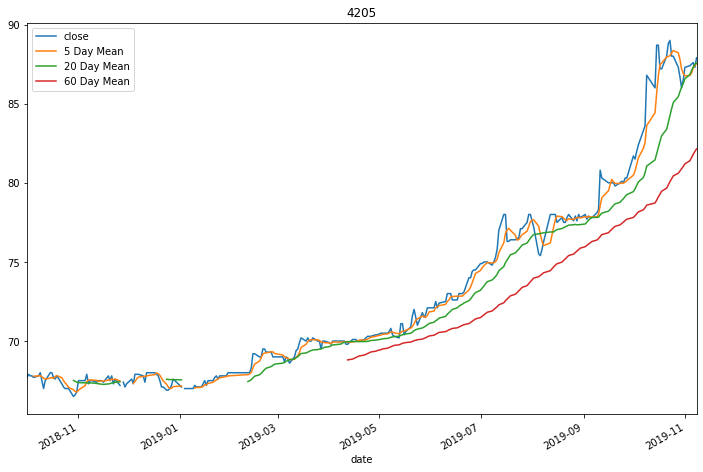

In [82]:
plt.title(ta)
df["收盤價"].plot(figsize=(12,8))
df["收盤價"].rolling(window=5).mean().plot(figsize=(12,8),label='5 Day Mean')
df["收盤價"].rolling(window=20).mean().plot(figsize=(12,8),label='20 Day Mean')
df["收盤價"].rolling(window=60).mean().plot(figsize=(12,8),label='60 Day Mean')
plt.legend(loc='upper left',labels=["close",'5 Day Mean','20 Day Mean','60 Day Mean'])